In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

transactions = []
for i in range(len(data)):
    transaction = []
    for j in range(len(data.columns)):
        if str(data.values[i, j])!='nan':
            transaction.append(str(data.values[i, j]))
    transactions.append(transaction)

            

In [4]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [5]:
te = TransactionEncoder()
x = te.fit_transform(transactions)

In [6]:
len(te.columns_)

120

In [7]:
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [8]:
df = pd.DataFrame(x, columns=te.columns_)

In [9]:
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
freq_itemset = apriori(df, min_support=0.01, use_colnames=True)

In [11]:
freq_itemset

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, ground beef, mineral water)"
253,0.017064,"(spaghetti, ground beef, mineral water)"
254,0.015731,"(spaghetti, milk, mineral water)"
255,0.010265,"(olive oil, spaghetti, mineral water)"


In [12]:
rules = association_rules(freq_itemset, metric='confidence', min_threshold=0.10)

In [13]:
print("List of Transactions:")
for i in range(5):
    transaction = transactions[i]
    print(f"Transaction {i + 1}: {transaction}")

List of Transactions:
Transaction 1: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
Transaction 2: ['burgers', 'meatballs', 'eggs']
Transaction 3: ['chutney']
Transaction 4: ['turkey', 'avocado']
Transaction 5: ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [14]:
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
3,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767
4,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,0.002779,1.039630,0.178411
...,...,...,...,...,...,...,...,...,...,...
95,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232,0.188267
96,(frozen smoothie),(eggs),0.063325,0.179709,0.011065,0.174737,0.972330,-0.000315,0.993975,-0.029485
97,(frozen vegetables),(eggs),0.095321,0.179709,0.021730,0.227972,1.268559,0.004600,1.062514,0.234010
98,(eggs),(frozen vegetables),0.179709,0.095321,0.021730,0.120920,1.268559,0.004600,1.029121,0.258084


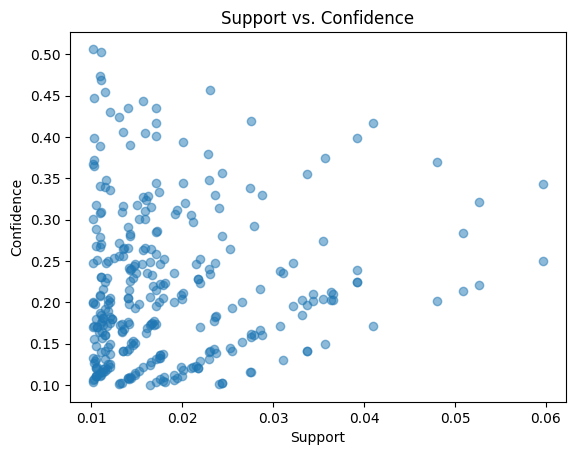

In [15]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()

In [16]:
rules[rules['antecedents'] == {'cake'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
25,(cake),(chocolate),0.081056,0.163845,0.013598,0.167763,1.023915,0.000318,1.004708,0.025417
26,(cake),(eggs),0.081056,0.179709,0.019064,0.235197,1.308765,0.004498,1.072552,0.256731
28,(cake),(french fries),0.081056,0.170911,0.017864,0.220395,1.289533,0.004011,1.063473,0.244330
30,(cake),(frozen vegetables),0.081056,0.095321,0.010265,0.126645,1.328618,0.002539,1.035866,0.269155
32,(cake),(green tea),0.081056,0.132116,0.014131,0.174342,1.319617,0.003423,1.051143,0.263568
34,(cake),(milk),0.081056,0.129583,0.013332,0.164474,1.269256,0.002828,1.041759,0.230849
36,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921,0.322617
38,(cake),(pancakes),0.081056,0.095054,0.011865,0.146382,1.539983,0.004160,1.060129,0.381571
40,(cake),(spaghetti),0.081056,0.174110,0.018131,0.223684,1.284728,0.004018,1.063858,0.241174


In [17]:
import networkx as nx

In [18]:
G = nx.DiGraph()

In [19]:
item_columns = te.columns_
G.add_nodes_from(item_columns)

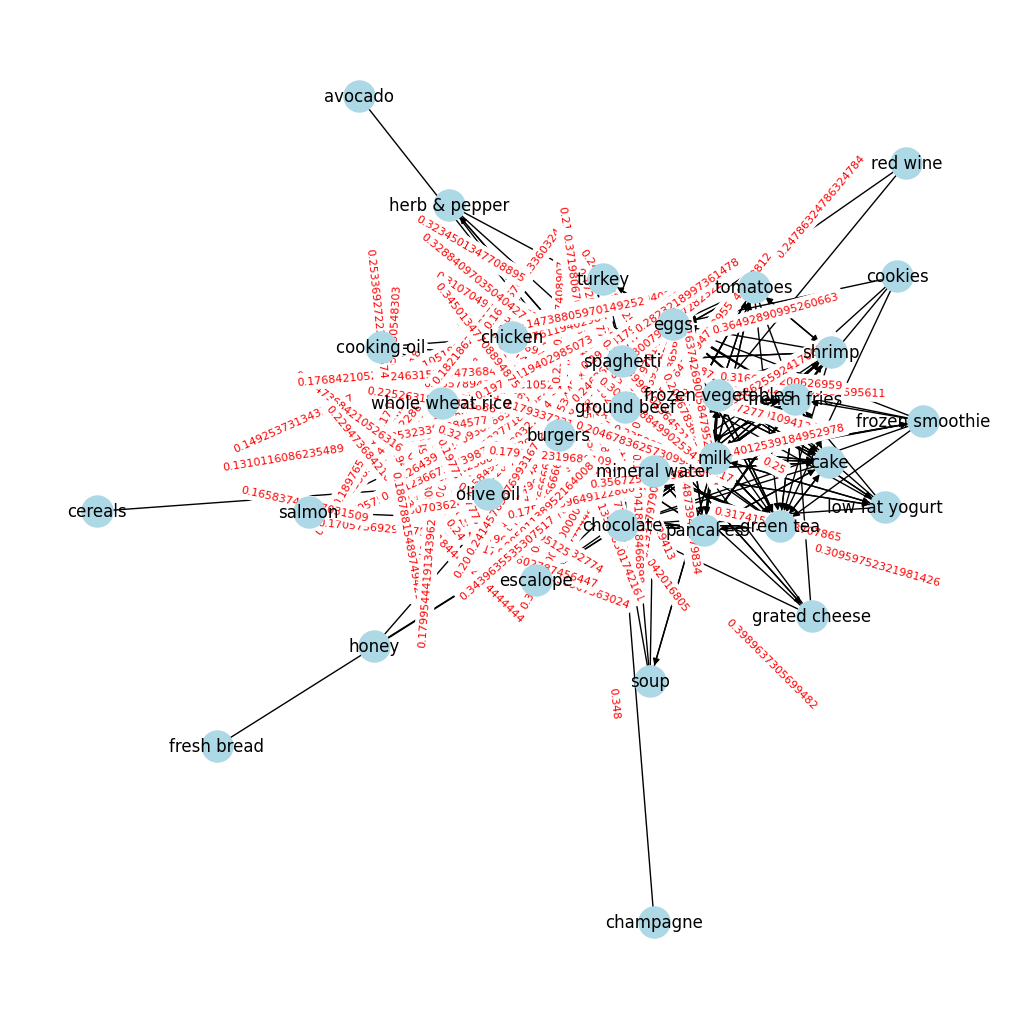

In [26]:

G = nx.DiGraph()

for _, row in rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    confidence = row['confidence']
    
    G.add_edge(antecedent, consequent, confidence=confidence)



edge_labels = {}
pos = nx.spring_layout(G)
for edge in G.edges():
    a, c = edge  
    confidence = G[a][c]['confidence'] 
    edge_labels[edge] = confidence


plt.figure(figsize=(10, 10))
nx.draw(G,with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')


nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, font_color='red')


plt.show()


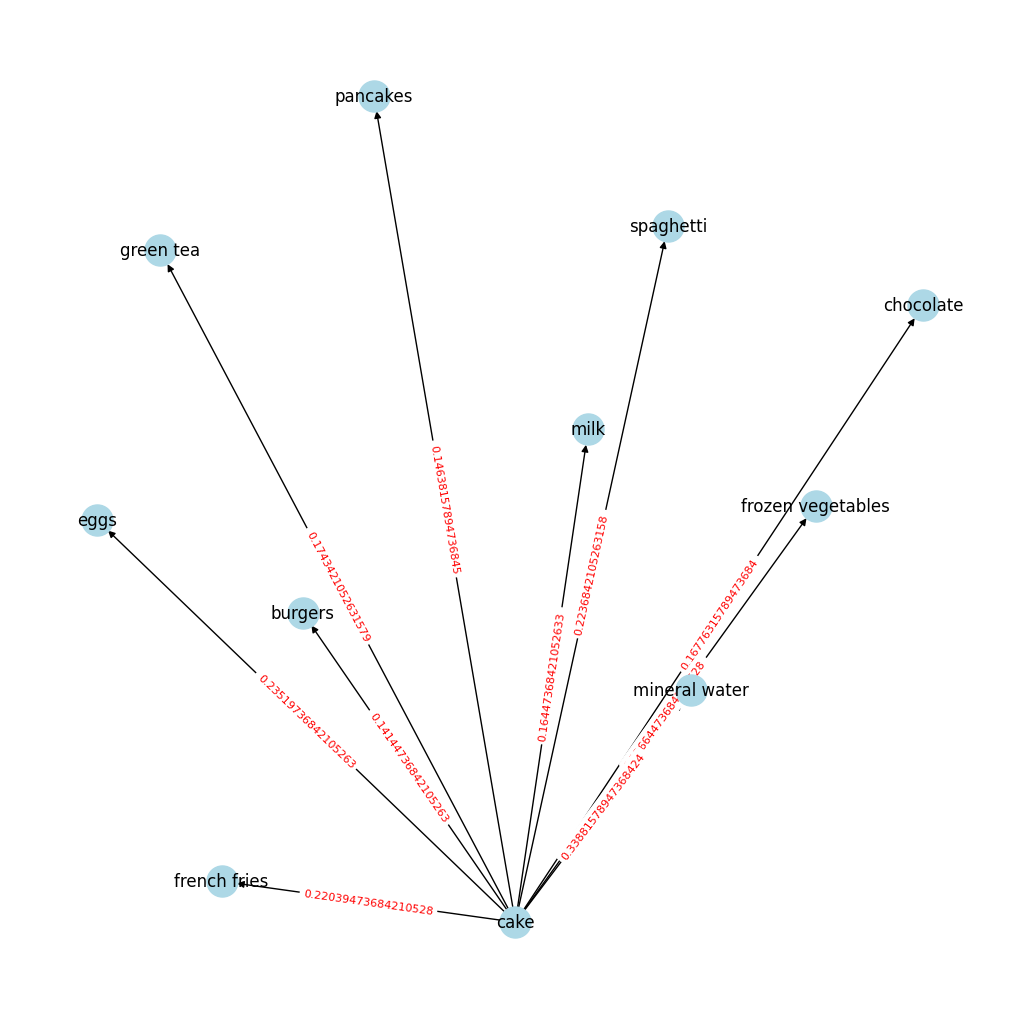

In [27]:
G = nx.DiGraph()

for _, row in rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    confidence = row['confidence']

    if antecedent == 'cake':
        G.add_edge(antecedent, consequent, confidence=confidence)



edge_labels = {}

for edge in G.edges():
    a, c = edge  
    confidence = G[a][c]['confidence'] 
    edge_labels[edge] = confidence


plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black')


nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, font_color='red')


plt.show()
